In [26]:

import numpy as np
import pandas as pd
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers
import datetime as dt
import seaborn as sns
from plotly.offline import init_notebook_mode
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pylab import rcParams
tf.disable_v2_behavior()
tf.compat.v1.reset_default_graph()
keras.backend.clear_session()
warnings.filterwarnings('ignore')


In [232]:
MainDataset_visualization = pd.read_csv("./bank.csv", ";")
MainDataset = pd.read_csv("./bank.csv", ";")
MainDataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 1) Label Encoding for Categorical Features


In [11]:
MainLabelEncoder = LabelEncoder()

MainDataset.marital = MainLabelEncoder.fit_transform(MainDataset.marital)
MainDataset.housing = MainLabelEncoder.fit_transform(MainDataset.housing)
MainDataset.deposit = MainLabelEncoder.fit_transform(MainDataset.loan)
MainDataset.loan = MainLabelEncoder.fit_transform(MainDataset.default)
MainDataset.poutcome = MainLabelEncoder.fit_transform(MainDataset.poutcome)
MainDataset.contact = MainLabelEncoder.fit_transform(MainDataset.contact)
MainDataset.job = MainLabelEncoder.fit_transform(MainDataset.job)
MainDataset.education = MainLabelEncoder.fit_transform(MainDataset.education)
MainDataset.default = MainLabelEncoder.fit_transform(MainDataset.default)
MainDataset.y = MainLabelEncoder.fit_transform(MainDataset.y)

MainDataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,oct,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,0,0,11,may,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,apr,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,0,2,3,jun,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,may,226,1,-1,0,3,0


| Header      | Definition                                                           |
| ----------- | -------------------------------------------------------------------- |
| `Age`       | سن مشتری                                                             |
| `Job`       | شغل مشتری                                                            |
| `Martial`   | وضعیت تاهل مشتری‌ها                                                  |
| `Education` | سطح رضایت مشتری ها                                                   |
| `Default`   | به صورت پیش فرض اعتبار دارد                                          |
| `Housing`   | آیا مشتری وام مسکن دارد؟                                             |
| `Loan`      | آیا مشتری وام شخصی دارد؟                                             |
| `Balance`   | بالانس مالی مشتری                                                    |
| `Contact`   | نوع ارتباط                                                           |
| `Month`     | آخرین ماه ارتباطی سال                                                |
| `Day`       | آخرین روز ارتباطی هفته                                               |
| `Duration`  | مدت آخرین ارتباط به ثانیه                                            |
| `Campaign`  | تعداد برقراری ارتباطی که در طول کمپین برای این مشتری انجام شده است   |
| `Pdays`     | تعداد روزهایی که بعد از آخرین ارتبط با مشتری از کمپین قبلی گذشته است |
| `Previous`  | تعداد ارتباط‌هایی که قبل از کمپین کنونی برای این مشتری برقرار شده    |
| `Poutcome`  | خروجی کمپین قبلی                                                     |
| `Deposit`   | آیا مشتری برای سپرده مدت داری ثبت نام کرده است                       |


### 2) Exploratory Data Analysis


In [12]:

MainDataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   int32 
 2   marital    4521 non-null   int32 
 3   education  4521 non-null   int32 
 4   default    4521 non-null   int32 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int32 
 7   loan       4521 non-null   int32 
 8   contact    4521 non-null   int32 
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   int32 
 16  y          4521 non-null   int32 
dtypes: int32(9), int64(7), object(1)
memory usage: 441.6+ KB


In [13]:

MainDataset = MainDataset.drop(['month'], axis=1)


### 2_1) Spliting the Data into train ans test


In [14]:
from sklearn.model_selection import train_test_split

X = MainDataset.drop(['y'], axis=1)
Y = MainDataset[['y']]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1)


In [15]:

print("Train data shape:{}".format(X_train.shape))
print("Train data shape:{}".format(X_test.shape))
print("Train data shape:{}".format(y_train.shape))
print("Train data shape:{}".format(y_test.shape))


Train data shape:(2892, 15)
Train data shape:(905, 15)
Train data shape:(2892, 1)
Train data shape:(905, 1)


### 3) An Overview of The Intial Multi Perceptron Model


In [16]:

X_train = np.concatenate((X_train, X_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)


In [17]:

X_train.shape, y_train.shape


((3797, 15), (3797, 1))

In [20]:

# small MLP model to establish baseline
learning_rate = 0.01
n_epochs = 50
batch_size = 100
input_shape = X_train[0].shape

model = Sequential()
model.add(Dense(15, activation='relu', input_shape=input_shape))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [21]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')
network_metadata = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=20, batch_size=100, callbacks=[early_stopping])


Train on 3797 samples, validate on 905 samples
Epoch 1/20
3797/3797 [==============================] - 2s 557us/sample - loss: 794.6833 - val_loss: 9.8251
Epoch 2/20
3797/3797 [==============================] - 0s 18us/sample - loss: 10.7220 - val_loss: 2.6334
Epoch 3/20
3797/3797 [==============================] - 0s 17us/sample - loss: 1.8758 - val_loss: 1.3412
Epoch 4/20
3797/3797 [==============================] - 0s 17us/sample - loss: 1.0839 - val_loss: 0.9880
Epoch 5/20
3797/3797 [==============================] - 0s 18us/sample - loss: 0.8617 - val_loss: 0.8432
Epoch 6/20
3797/3797 [==============================] - 0s 15us/sample - loss: 0.7347 - val_loss: 0.7722
Epoch 7/20
3797/3797 [==============================] - 0s 33us/sample - loss: 0.6667 - val_loss: 0.6755
Epoch 8/20
3797/3797 [==============================] - 0s 16us/sample - loss: 0.5833 - val_loss: 0.6097
Epoch 9/20
3797/3797 [==============================] - 0s 15us/sample - loss: 0.5315 - val_loss: 0.5503
Epoc

#### 3-1) Evaluation for the initial Model


In [22]:
# Evaluation for the Model
model.evaluate(X_test, y_test)


0.241107716061463

In [23]:

history_dict = network_metadata.history
history_dict.keys()


dict_keys(['loss', 'val_loss'])

In [24]:
history_dict['loss']


[794.6832673366929,
 10.722044074538509,
 1.8757953334237703,
 1.0839013989454576,
 0.8616516251202347,
 0.734665115538289,
 0.6666993328637753,
 0.5832956687130048,
 0.5315415483259482,
 0.47896306979238656,
 0.43629939582180216,
 0.40094732525538923,
 0.36778398878109086,
 0.33904409483134007,
 0.3136389754243609,
 0.2910610383981336,
 0.2766285864638755,
 0.25809497256121383,
 0.24215782885649406,
 0.22849245908262228]

### 4) Comparing the MLP classification Performance on 4 Different Models

#### We have different hyperparameters for each of these Models


4_1) The baseline Model with 2 layers


In [25]:
# The base model with 2 layers

def baseline_model():
    input_shape = X_train[0].shape
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=input_shape))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


4_2) The Second Model with 3 layers


In [27]:
# Larger Model
# Step 1: We can adjust the model based on the hyperparameters

def larger_model():
    input_shape = X_train[0].shape
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=input_shape))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(1, kernel_initializer='normal')
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model


4_2) The Thirds Model with 3 layers and 1/2\*the Neurons of the First Model


In [28]:

# wider model, here we have more neurons in the layer
def wider_model():
    input_shape = X_train[0].shape
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=input_shape))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model


4_2) The Fourth Model with 4 layers and 2/5\*the Neurons of the First Model


In [29]:
# this is the fourth model
# this is both deep and wider in terms of neurons

def wider_deeper_model():
    input_shape = X_train[0].shape
    model = Sequential()
    model.add(Dense(25, activation='relu', input_shape=input_shape))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mae'])
    return model


In [30]:

# forming the pipline
all_models = [baseline_model, larger_model, wider_model, wider_deeper_model]
type(all_models[1])


function

5. Creating a Pipeline Architecture for all of the Models


In [31]:
# set seed for reproducibility
seed = 7

# Here we add a data Scalar and the keras regressor containing our model function to a list of estimator
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('MLP', KerasRegressor(
    build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)))

# Here we add our estimator to a Sklearn pipeline
pipeline = Pipeline(estimators)

# Here we initialize instance of k-fold validation from sklearn APi
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)


6. Evaluation of the all 4 Models


In [32]:
# Performing all the 4 Models for our Bank Marketing data
for i in all_models:

    # initialize a fixed random weight as a seed
    np.random.seed(seed)

    # pass pipeline instance, traing data and labels, and k-fold crossvalidator instance to the evaluate score
    results = cross_val_score(pipeline, X_train, y_train, cv=kfold)

    # Print the name of the each of the 4 models
    print('Model Type:', i)

    # The results variable contain the mean squared errors for each of the 5 cross validation runs.
    print('MSE per fold:')
    print(results)

    # print mean and standard deviation of all five folds, per model
    print("Average MSE of all 5 runs: %.2f, with standard dev: (%.2f)" %
          (-1*(results.mean()), results.std()))


Model Type: <function baseline_model at 0x000001D1B3B98EE0>
MSE per fold:
[-0.09742693 -0.08726407 -0.0684009  -0.07763731 -0.08636506]
Average MSE of all 5 runs: 0.08, with standard dev: (0.01)
Model Type: <function larger_model at 0x000001D1DD234DC0>
MSE per fold:
[-0.09533065 -0.08720466 -0.06745771 -0.0763771  -0.08739136]
Average MSE of all 5 runs: 0.08, with standard dev: (0.01)
Model Type: <function wider_model at 0x000001D1DD007490>
MSE per fold:
[-0.09632219 -0.08801767 -0.07072638 -0.07640748 -0.0848845 ]
Average MSE of all 5 runs: 0.08, with standard dev: (0.01)
Model Type: <function wider_deeper_model at 0x000001D1DD041FC0>
MSE per fold:
[-0.0971282  -0.0851978  -0.06823831 -0.07558048 -0.08532131]
Average MSE of all 5 runs: 0.08, with standard dev: (0.01)


## 7) Low Rank Approximation of the Bank Marketing Dataset

### Here we use 3 Different Factorizations


### Singular Value Decomposition with pytorch


In [91]:
import torch
import torch.nn as nn

print(type(X_train))

x_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)


x_train_tensor = x_train_tensor.float()
y_train_tensor = y_train_tensor.float()


print(type(x_train_tensor))
u, s, v = torch.svd(x_train_tensor)

print(" ")
print(u.shape)
print(" ")
print(s.shape)
print(" ")
print(v.shape)
print(" ")


<class 'numpy.ndarray'>
<class 'torch.Tensor'>
 
torch.Size([3797, 15])
 
torch.Size([15])
 
torch.Size([15, 15])
 


### 7-1) Low Rank Factorization for Principle Component Analysis with pytorch


In [95]:

pca_lowrank_factorization = torch.pca_lowrank(
    x_train_tensor, q=3, center=True, niter=2)

print(x_train_tensor.shape)
print(" ")
print(pca_lowrank_factorization)
print(" ")


torch.Size([3797, 15])
 
(tensor([[-0.0025, -0.0102, -0.0477],
        [-0.0030,  0.0149,  0.0066],
        [-0.0042,  0.0110, -0.0314],
        ...,
        [ 0.0024,  0.0098,  0.0067],
        [-0.0066,  0.0158, -0.0487],
        [-0.0034, -0.0126,  0.0067]]), tensor([186045.4688,  16034.6797,   6203.4053]), tensor([[ 2.9969e-04,  2.7977e-04,  1.4999e-03],
        [-3.9537e-07,  1.4112e-04,  1.2203e-03],
        [ 3.4347e-06,  3.9818e-06, -9.0168e-05],
        [ 1.5850e-05,  5.0562e-05, -8.6835e-05],
        [-3.0923e-06,  8.6737e-06,  3.7498e-05],
        [ 1.0000e+00, -1.6717e-03,  2.9146e-04],
        [-7.4079e-06, -3.6037e-05, -6.1503e-04],
        [-3.0923e-06,  8.6737e-06,  3.7498e-05],
        [-3.1853e-06,  8.0461e-06,  2.1921e-03],
        [-1.1638e-05,  8.9440e-04,  7.3159e-03],
        [-1.6720e-03, -1.0000e+00,  1.2597e-03],
        [-5.5887e-06,  9.5517e-04,  3.0086e-03],
        [ 2.8950e-04, -1.2500e-03, -9.9988e-01],
        [ 1.5470e-05, -5.6733e-05, -9.9288e-03],
  

### 7_2) Low Rank Factorization for Singular Value Decomposition with pytorch


In [65]:

svd_lowrank_factorization = torch.svd_lowrank(
    x_train_tensor, q=3, niter=2, M=None)
print(svd_lowrank_factorization)


(tensor([[-4.8218e-03, -1.9150e-02, -4.6583e-02],
        [-4.3466e-03,  8.4136e-05,  5.4407e-04],
        [-3.2406e-03, -4.0049e-03, -3.5577e-02],
        ...,
        [-9.2283e-03, -2.0123e-03,  2.1430e-03],
        [-1.1154e-03, -1.4866e-03, -5.3150e-02],
        [-4.0745e-03, -2.0100e-02,  5.9324e-03]]), tensor([206496.3594,  21943.6094,   6407.7095]), tensor([[-5.5860e-03, -7.0563e-02, -6.6694e-02],
        [-5.7395e-04, -7.5963e-03, -6.2148e-03],
        [-1.5262e-04, -1.9912e-03, -1.9523e-03],
        [-1.7219e-04, -2.0627e-03, -2.0766e-03],
        [ 2.1962e-07, -3.3670e-05, -5.7568e-06],
        [-9.9942e-01,  3.3862e-02,  3.1736e-03],
        [-6.7105e-05, -1.0183e-03, -1.4858e-03],
        [ 2.1962e-07, -3.3670e-05, -5.7568e-06],
        [-8.0971e-05, -1.1079e-03,  9.6745e-04],
        [-2.0679e-03, -2.7298e-02, -2.0224e-02],
        [-3.3178e-02, -9.9360e-01,  8.1574e-02],
        [-3.6125e-04, -4.3836e-03, -2.3691e-03],
        [-5.4913e-03, -7.6072e-02, -9.9414e-01],
    

In [96]:
type(svd_lowrank_factorization)


tuple

In [114]:


u, s, v = np.linalg.svd(MainDataset, full_matrices=False)
print(u.shape)
print(s.shape)
print(v.shape)


(4521, 16)
(16,)
(16, 16)


### 8) Re-executing the Model pipeline for Low rank SVD Approxiamtion


In [160]:

SVD_approxiamtion = np.dot(u, np.dot(s, v.T))
SVD_approxiamtion = SVD_approxiamtion[0:4480]
SVD_approxiamtion.shape
SVD_approxiamtion = np.reshape(SVD_approxiamtion, (280, 16))


In [166]:

SVD_approxiamtion_dataset = pd.DataFrame(SVD_approxiamtion, columns=[
                                         'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])
SVD_approxiamtion_dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,1667.073695,-1413.299359,80.938720,1869.544164,6879.181292,1110.122047,-598.729553,4193.563299,4006.465970,2348.462414,-1286.337675,3664.295605,1559.879903,-1546.853160,-221.382573,1831.890434
1,2894.918457,1364.648692,-181.288857,2092.836164,2985.007547,3207.664513,4745.816815,4753.015592,-495.045555,754.229475,5576.181924,7204.099417,4397.056885,5183.773159,1156.401324,1564.788954
2,6581.514044,-5136.922042,3314.468125,2780.080460,8872.164511,1511.125097,-4441.314224,-120.130454,-4569.897397,3348.393505,3486.182071,1989.897040,2065.771033,3216.220517,7616.353366,-1261.822167
3,3239.848539,3014.348733,-1450.292477,-7852.398936,2595.836150,213.678612,3704.851290,3259.717574,7024.089178,646.363011,871.974275,2458.027227,1462.433536,6425.430542,2139.259615,5343.162821
4,-168.147542,4735.694145,903.460548,1312.975828,992.564653,1947.690910,745.151772,2786.292163,307.119651,4359.259067,5298.957545,4863.002805,-52.901422,3937.422006,1749.127432,2219.054005


### 9) Data binning

#### Data binning = bucketing the SVD Approxiamtion


In [227]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

Kbin_age = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
Kbin_job = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

Kbin_marital = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_education = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')

Kbin_default = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_balance = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')

Kbin_housing = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_loan = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

Kbin_contact = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_day = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

Kbin_duration = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_campaign = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')

Kbin_pdays = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
Kbin_previous = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')

Kbin_poutcome = KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='quantile')
Kbin_y = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')


In [228]:

trf = ColumnTransformer([('first', Kbin_age, [0]), ('second', Kbin_job, [1]), ('third', Kbin_marital, [2]), ('fourth', Kbin_education, [3]), ('five', Kbin_default, [4]), ('six', Kbin_balance, [5]), ('seven', Kbin_housing, [6]), ('eight', Kbin_loan, [
                        7]), ('ninth', Kbin_contact, [8]), ('ten', Kbin_day, [9]), ('eleventh', Kbin_duration, [10]), ('twelve', Kbin_campaign, [11]), ('thirteen', Kbin_pdays, [12]), ('fourtheen', Kbin_previous, [13]), ('fiftheen', Kbin_poutcome, [14]), ('sixteen', Kbin_y, [15])])

transformed_data = trf.fit_transform(SVD_approxiamtion_dataset)

print(trf.named_transformers_['twelve'].n_bins_)
print(trf.named_transformers_['twelve'].bin_edges_)
print(" ")
print(transformed_data.shape)


[3]
[array([-10311.52081762,   1346.02706559,   3290.34931353,   8804.89798515])]
 
(280, 16)


In [229]:


SVD_approxiamtion_transformed_data = pd.DataFrame(transformed_data, columns=[
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])
SVD_approxiamtion_transformed_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0
2,2.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0
4,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0


### 10) spliting the data low rank SVD Approxiamtion into test and train


In [230]:

X_SVD = SVD_approxiamtion_transformed_data.drop(['y'], axis=1)
Y_SVD = SVD_approxiamtion_transformed_data[['y']]

X_train_SVD, X_test_SVD, y_train_SVD, y_test_SVD = train_test_split(
    X_SVD, Y_SVD, test_size=0.2, random_state=1)
X_train_SVD, X_validation_SVD, y_train_SVD, y_validation_SVD = train_test_split(
    X_train_SVD, y_train_SVD, test_size=0.2, random_state=1)


### 11) Re-execute the Four MLP models for low rank SVD Approxiamtion, the evaluation part


In [231]:

# Performing all the 4 Models for our Bank Marketing data
for i in all_models:

    # initialize a fixed random weight as a seed
    np.random.seed(seed)

    # pass pipeline instance, traing data and labels, and k-fold crossvalidator instance to the evaluate score
    results = cross_val_score(pipeline, X_train_SVD, y_train_SVD, cv=kfold)

    # Print the name of the each of the 4 models
    print('Model Type:', i)

    # The results variable contain the mean squared errors for each of the 5 cross validation runs.
    print('MSE per fold:')
    print(results)

    # print mean and standard deviation of all five folds, per model
    print("Average MSE of all 5 runs: %.2f, with standard dev: (%.2f)" %
          (-1*(results.mean()), results.std()))


Model Type: <function baseline_model at 0x000001D1B3B98EE0>
MSE per fold:
[-0.63462736 -0.75835932 -0.95306579 -0.78286585 -1.04137401]
Average MSE of all 5 runs: 0.83, with standard dev: (0.15)
Model Type: <function larger_model at 0x000001D1DD234DC0>
MSE per fold:
[-0.65812962 -0.94076459 -1.33917302 -0.77469646 -1.07592445]
Average MSE of all 5 runs: 0.96, with standard dev: (0.24)
Model Type: <function wider_model at 0x000001D1DD007490>
MSE per fold:
[-0.66904387 -0.94620881 -1.04008812 -0.79346571 -1.16452142]
Average MSE of all 5 runs: 0.92, with standard dev: (0.18)
Model Type: <function wider_deeper_model at 0x000001D1DD041FC0>
MSE per fold:
[-0.62509907 -0.87887259 -1.03138653 -0.82153781 -1.2022236 ]
Average MSE of all 5 runs: 0.91, with standard dev: (0.19)


### 12) Insights from the Bank marketing DataSet

#### Visualization and Explanatory data analysis


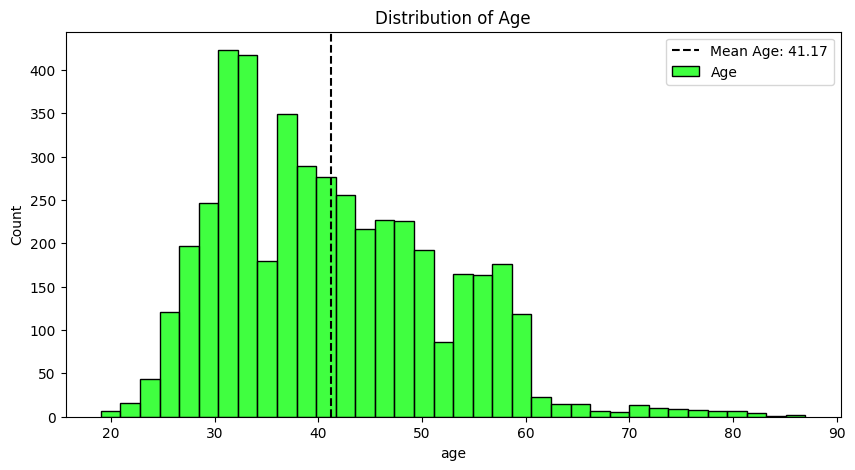

In [234]:

plt.figure(figsize=(10, 5))
sns.histplot(x=MainDataset_visualization['age'], color='Lime', label='Age')
plt.axvline(x=MainDataset_visualization['age'].mean(), color='k', linestyle="--",
            label='Mean Age: {}'.format(round(MainDataset_visualization['age'].mean(), 2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()


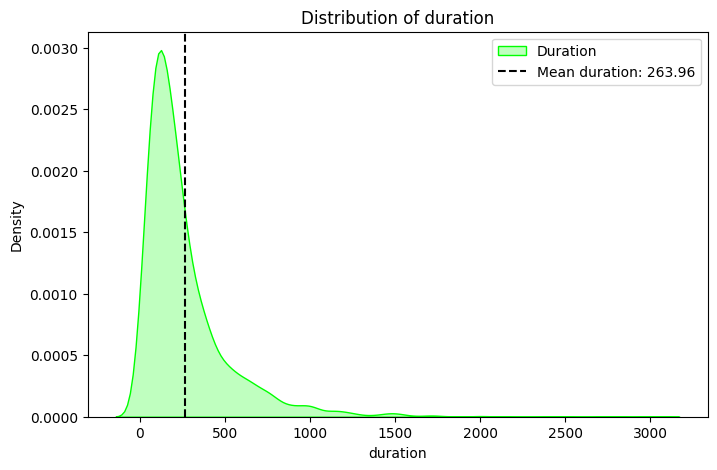

In [235]:

plt.figure(figsize=(8, 5))
sns.kdeplot(x=MainDataset_visualization['duration'],
            color='Lime', shade=True, label='Duration')
plt.axvline(x=MainDataset_visualization['duration'].mean(), color='k', linestyle="--",
            label='Mean duration: {}'.format(round(MainDataset_visualization['duration'].mean(), 2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()


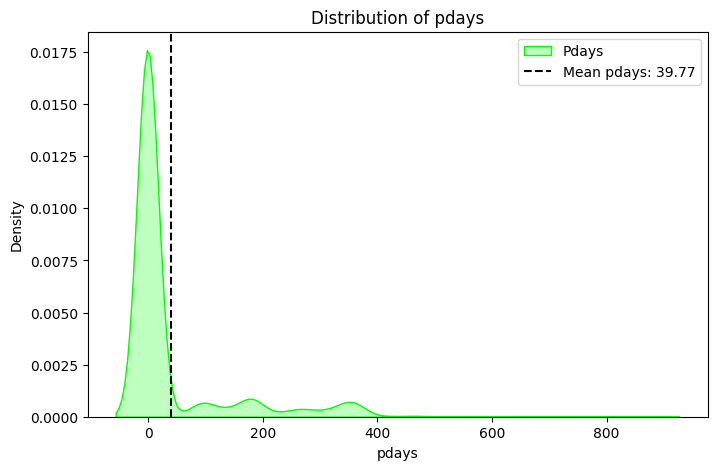

In [236]:

plt.figure(figsize=(8, 5))
sns.kdeplot(x=MainDataset_visualization['pdays'],
            color='Lime', shade=True, label='Pdays')
plt.axvline(x=MainDataset_visualization['pdays'].mean(), color='k', linestyle="--",
            label='Mean pdays: {}'.format(round(MainDataset_visualization['pdays'].mean(), 2)))
plt.legend()
plt.title('Distribution of pdays')
plt.show()


In [237]:

fig = px.bar(MainDataset_visualization.job.value_counts().reset_index().rename(columns={
             'index': 'Job', 'job': 'Count'}), x='Job', y='Count', color='Job', text='Count', template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Job type of the Customers',
                  font_family="Times New Roman", title_font_family="Times New Roman")


In [238]:

fig = px.pie(MainDataset_visualization.marital.value_counts().reset_index().rename(columns={
             'index': 'Marital-Status', 'marital': 'Count'}), names='Marital-Status', values='Count', hole=0.5, template='plotly_white', color_discrete_sequence=['HotPink', 'LightSeaGreen', 'SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, showlegend=True,
                  legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, legend=dict(
    orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.show()


In [239]:

fig = px.bar(MainDataset_visualization.education.value_counts().reset_index().rename(columns={
             'index': 'Education', 'education': 'Count'}), x='Education', y='Count', color='Education', text='Count', template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, legend_title_text='<b>Education', title_text='<b>Education of the customers',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.show()
fig = px.pie(MainDataset_visualization.education.value_counts().reset_index().rename(columns={
             'index': 'Education', 'education': 'Count'}), names='Education', values='Count', hole=0.5, template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, showlegend=True,
                  legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, legend=dict(
    orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.show()


In [241]:

from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(rows=1, cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {
                    "type": "pie"}]], subplot_titles=('Credit in Default', 'Housing Loan', 'Personal Loan'))
fig.add_trace(go.Pie(values=MainDataset_visualization.default.value_counts().reset_index().rename(columns={'index': 'Default', 'default': 'Count'})['Count'], labels=MainDataset_visualization.default.value_counts(
).reset_index().rename(columns={'index': 'Default', 'default': 'Count'})['Default'], hole=0.7, marker_colors=['Crimson', 'ForestGreen'], name='Has Credit in Default?', showlegend=False), row=1, col=1)
fig.add_trace(go.Pie(values=MainDataset_visualization.housing.value_counts().reset_index().rename(columns={'index': 'Housing', 'housing': 'Count'})['Count'], labels=MainDataset_visualization.housing.value_counts(
).reset_index().rename(columns={'index': 'Housing', 'housing': 'Count'})['Housing'], hole=0.7, marker_colors=['Crimson', 'ForestGreen'], name='Housing Loan', showlegend=False), row=1, col=2)
fig.add_trace(go.Pie(values=MainDataset_visualization.loan.value_counts().reset_index().rename(columns={'index': 'Loan', 'loan': 'Count'})['Count'], labels=MainDataset_visualization.loan.value_counts(
).reset_index().rename(columns={'index': 'Loan', 'loan': 'Count'})['Loan'], hole=0.7, marker_colors=['Crimson', 'ForestGreen'], name='Personal Loan', showlegend=True), row=1, col=3)

fig.update_layout(title_x=0.5, template='simple_white', showlegend=True, legend_title_text=" ",
                  title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis', font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))


In [242]:

fig = px.pie(MainDataset_visualization.contact.value_counts().reset_index().rename(columns={
             'index': 'Contact', 'contact': 'Count'}), names='Contact', values='Count', hole=0.5, template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, showlegend=True, legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, legend=dict(
    orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.show()


In [243]:

fig = px.bar(MainDataset_visualization.month.value_counts().reset_index().rename(columns={
             'index': 'Month', 'month': 'Count'}), x='Month', y='Count', color='Month', text='Count', template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Last Contact Month of the year',
                  font_family="Times New Roman", title_font_family="Times New Roman")


In [244]:

fig = px.bar(MainDataset_visualization.poutcome.value_counts().reset_index().rename(columns={
             'index': 'Poutcome', 'poutcome': 'Count'}), x='Poutcome', y='Count', color='Poutcome', text='Count', color_discrete_sequence=['grey', 'red', 'green', 'blue'], template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Outcome of previous marketing Campaign',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.show()

fig = px.pie(MainDataset_visualization.poutcome.value_counts().reset_index().rename(columns={
             'index': 'Poutcome', 'poutcome': 'Count'}), names='Poutcome', values='Count', hole=0.5, template='simple_white', color_discrete_sequence=['grey', 'red', 'blue', 'green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, showlegend=True,
                  legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, title_text='<b>Outcome of previous marketing Campaign',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_layout(title_x=0.5, legend=dict(
    orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1))
fig.show()


In [247]:

fig = px.pie(MainDataset_visualization.groupby(['y'], as_index=False)['age'].count().rename(
    columns={'age': 'Count'}), names='y', values='Count', template='ggplot2', hole=0.8)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5, showlegend=True, legend_title_text='<b>Deposit')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5, title_text='<b>Term Deposits',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_layout(title_x=0.5, legend=dict(
    orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1))
fig.show()


In [248]:

a = MainDataset_visualization.groupby(
    ['job'], as_index=False)['balance'].mean()
a['balance'] = round(a['balance'], 1)

fig = px.bar(a.sort_values(by='balance', ascending=False), x='job',
             y='balance', text='balance', color='job', template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5, title_text='<b>Average balance of the clients by their job type',
                  legend_title_text='Job Type', font_family="Times New Roman", title_font_family="Times New Roman")


In [251]:

MainDataset_visualization['Duration'] = MainDataset_visualization['duration'].apply(
    lambda x: 'Above_Average_Duration' if x >= MainDataset_visualization['duration'].mean() else 'Below_Average_Duration')
a = MainDataset_visualization.groupby(['Duration', 'y'], as_index=False)[
    'age'].count().rename(columns={'age': 'Count'})
a['percent'] = round(a['Count']*100/a.groupby('Duration')
                     ['Count'].transform('sum'), 1)
a['percent'] = a['percent'].apply(lambda x: '{}%'.format(x))

fig = px.bar(a, x='Duration', y='Count', text='percent', color='y', barmode='group',
             template='simple_white', color_discrete_sequence=['MediumPurple', 'YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>', title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_layout(legend=dict(
    orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08, legend=dict(
    orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.update_traces(textposition='outside')
fig.show()


In [252]:

MainDataset_visualization['Balance'] = MainDataset_visualization['balance'].apply(
    lambda x: 'Above_Average' if x >= MainDataset_visualization['balance'].mean() else 'Below_Average')
a = MainDataset_visualization.groupby(['Balance', 'y'], as_index=False)[
    'age'].count().rename(columns={'age': 'Count'})
a['percent'] = round(a['Count']*100/a.groupby('Balance')
                     ['Count'].transform('sum'), 1)
a['percent'] = a['percent'].apply(lambda x: '{}%'.format(x))

fig = px.bar(a, x='Balance', y='Count', text='percent', color='y', barmode='group',
             template='simple_white', color_discrete_sequence=['MediumPurple', 'YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>', title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Balance on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average balance and below average balance</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")
fig.update_layout(legend=dict(
    orientation='v', yanchor='middle', y=1.02, xanchor='right', x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08, legend=dict(
    orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig.update_traces(textposition='outside')
fig.show()


# The end of Notebook
